# Data Frames
Data frames are data structures which provide intuitive ways of handling data best represented in table-like form. They are a standard data type in R. Although there are other ways of handling data, data frames are particularly designed for common analysis operations on rows or columns, as we will see. File-based input and output of data is discussed at the end.
## Demo instructions:
1. A brief 1-2 paragraph overview of data frames in the language.
2. Create a data frame from scratch using hardcoded tabular data (consider something that parses multiline strings perhaps)
3. Select by row or by column
    - by column name or by row index
    - by numerical order (e.g. first or last)
4. Delete rows or columns by index and name
5. Select, delete, or change values using boolean indexing
6. Creating new columns through
    - Simple operations on previous columns (e.g. simple math operations)
    - Standard summary functions (e.g. sum, mean, std dev)
    - The map/apply function (advanced)
7. Grouped calculations (e.g. average of values in column Y for all x values in column X)
8. Handle missing data by (advanced)
    - Removing the rows with missing data
    - Filling with a specific value
    - Filling with a computed value (e.g. a median of known values)
9. Output data in CSV format
10. Reading data (from before) in using CSV format.

### Helpful [table](http://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html) to compare Python and R data frames directly.

## Solutions:

## 1. Paragraph Overview
A data frame is a structure used for storing data tables. It contains a list of vectors of equal length. A vector is a sequence of data elements of the same basic type. 

For example, you could have two vectors called *name* and *age*. We know that we have to make vectors be of the same length, so let's add some members. Under *name*, we can say “Naseeb, Natasha, Kimani”. Under *age*, we can say “24, 29, 31”.  Both vectors have three members, so they're of equal length, and the ages correspond with the name in the same order.

A data frame holds vectors of three possible data types: character, numeric, and logical. So in addition to the character and numeric types we've just seen, we can incorporate a logical data type too (a logical data type is either TRUE or FALSE):

In [2]:
# first let's create our vectors
name = c('Naseeb', 'Natasha', 'Kimani')
age = c('24', '29', '31')
logexample = c(TRUE, TRUE, FALSE)

# next, we make our data frame
df <- data.frame(name, age, logexample)
# df is your data frame! You can name it whatever you'd like. For now, let's print it:

print(df)

     name age logexample
1  Naseeb  24       TRUE
2 Natasha  29       TRUE
3  Kimani  31      FALSE


Data frames are particularly useful for creating or reading tabular data. Let's start working with one.

## 2. Create a data frame from scratch

In [3]:
# let's create some vectors:
department <- c('Mayor', 'Police', 'Aviation')
name <- c('Rahm Emanuel', 'Donald Falk', 'Anthony Evangelisti') 
salary <- c(216210, 100980, 300000)
startdate <- c('2010-11-1','2008-3-25','2007-3-14')

# now, let's put those vectors into our data frame and print it:
mydataframe <- data.frame(department, name, salary, startdate)
print(mydataframe)

  department                name salary startdate
1      Mayor        Rahm Emanuel 216210 2010-11-1
2     Police         Donald Falk 100980 2008-3-25
3   Aviation Anthony Evangelisti 300000 2007-3-14


The top line of the table, called the header, contains the column names. Each horizontal line afterward denotes a data row, which begins with the name of the row, and then followed by the actual data. Each data member of a row is called a cell.

## 3. Select by row or column
* By column name or by row index
* By numerical order (e.g. first or last)

### 3.1.a. By column name

There are a couple ways to access a column by its name. We will look at three ways:

In [4]:
mydataframe[["salary"]]

[1] 216210 100980 300000

In [5]:
mydataframe$salary

[1] 216210 100980 300000

In [6]:
mydataframe[,"salary"]
# the comma is not a typo; instead it signals a wildcard match for the rows.
# if you place a number before the comma, you will reference a specific cell, by its row number and column name

[1] 216210 100980 300000

### 3.1.b. By row index

In [7]:
mydataframe[1,]
# again, the comma is not a typo. this time, it signals a wildcard match for the columns.

department,name,salary,startdate
Mayor,Rahm Emanuel,216210,2010-11-1


### 3.2.a By numerical order for columns

In [8]:
# to access the first column
mydataframe[1]

department
Mayor
Police
Aviation


In [9]:
# to access the last column, we use the ncol function:
mydataframe[ncol(mydataframe)]

startdate
2010-11-1
2008-3-25
2007-3-14


### 3.2.b By numerical order for rows

In [10]:
# to access the first row by numerical order, we use the "head" function:
head(mydataframe, 1)

# the number after the data frame name indicates how many of the first rows to display

department,name,salary,startdate
Mayor,Rahm Emanuel,216210,2010-11-1


In [11]:
# to access the last row by numerical order, we use the "tail" function:
tail(mydataframe, 1)

# the number after the data frame name indicates how many of the last rows to display

,department,name,salary,startdate
3,Aviation,Anthony Evangelisti,3e+05,2007-3-14


## 4. Delete rows or columns by index and name

### 4.1. For rows:

In [12]:
# to delete a row by its index, we take the complement of the row we want to delete
# the "-" takes the complement of, in this example, the second row, so we get everything except the second row
# as we saw before, the comma is there to indicate a wildcard match for the columns
mydataframe[-c(2), ]

,department,name,salary,startdate
1,Mayor,Rahm Emanuel,216210,2010-11-1
3,Aviation,Anthony Evangelisti,300000,2007-3-14


In [13]:
# Delete row by name. This deletes the second row.
removethisrow <- 2
mydataframe[!(row.names(mydataframe) %in% removethisrow), ]

,department,name,salary,startdate
1,Mayor,Rahm Emanuel,216210,2010-11-1
3,Aviation,Anthony Evangelisti,300000,2007-3-14


### 4.2. For columns:

In [14]:
# to delete a column by its index, we follow a similar procedure as deleting a row by its index
# (note the placement of the comma)
mydataframe[,-c(2)]

department,salary,startdate
Mayor,216210,2010-11-1
Police,100980,2008-3-25
Aviation,300000,2007-3-14


In [15]:
# Delete column by name. This deletes the "salary" column.
deletecol <- "salary"
mydataframe[,!(names(mydataframe) %in% deletecol)]

department,name,startdate
Mayor,Rahm Emanuel,2010-11-1
Police,Donald Falk,2008-3-25
Aviation,Anthony Evangelisti,2007-3-14


**What is “c”?**

That's a great question! You'll see “c” everywhere in R. “C” stands for “combine”. It is a function that combines its arguments into a vector. We will get into what exactly vectors are later on, but for now, you just need to know that a vector is a sequence of data elements of the same type. Using “c” is essential when manipulating dataframes, since we are working with so many vectors. Notice that we use c() whenever we are making or referencing a vector or a list.

Here are some helpful links about “c”: 
* https://stackoverflow.com/questions/25268888/what-does-c-do-in-r
* http://www.r-tutor.com/r-introduction/vector
* https://www.statmethods.net/input/datatypes.html

## 5. Select, delete, or change using boolean indexing

Let's practice using a built-in dataset. For this tutorial, we will be using *mtcars*, which is a data set obtained in 1974. It stands for “motor trend car road test”. You can find other built in datasets [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/00Index.html).

Boolean indexing, or logical indexing, is useful when you want to select rows/columns that match a certain criteria. We use a “logical index vector” to do so. 

In [16]:
#Import data.
data(mtcars)

In [17]:
#Explore data. 
summary((mtcars)) #Gives you basic summary of dataset.

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [18]:
head(mtcars) #Displays first few lines of dataset.

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [19]:
dim(mtcars) #Displays dimensions of dataset.

[1] 32 11

In [20]:
# The member value is TRUE if the car has automatic transmission, and FALSE if otherwise. 
L = mtcars$am == 0 
L

[1] FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [21]:
# Select the cars with automatic transmission.
mtcars[L,]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3


In [22]:
# Delete elements without automatic transmission.
autonly<-mtcars[!(mtcars$am == 0),]
autonly

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4


## 6. Creating new columns through
    - Simple operations on previous columns (e.g. simple math operations)
    - Standard summary functions (e.g. sum, mean, std dev)
    - The map/apply function (advanced)

### 6.1 Simple operations on previous columns

Now, let's work with a new data frame that displays a gradebook:

In [23]:
exam.one <- c(85, 80, 95, 72, 88, 88, 90, 79, 59, 99, 86, 86, 93, 90)
exam.two <- c(85, 75, 90, 78, 85, 88, 88, 81, 67, 97, 87, 85, 90, 89)
exam.three <- c(89, 88, 93, 82, 90, 93, 92, 85, 73, 100, 90, 80, 97, 91)

gradebook <- data.frame(exam.one, exam.two, exam.three)
gradebook

exam.one,exam.two,exam.three
85,85,89
80,75,88
95,90,93
72,78,82
88,85,90
88,88,93
90,88,92
79,81,85
59,67,73
99,97,100


Let's create a new column for a fourth exam. We'll assume that this exam was easier than the previous one, and so everyone did 5 percent better.

In [24]:
gradebook$exam.four <- NA
# this creates a new column, called exam.four.
# right now, everything in that column is empty, or displays NA

In [25]:
# now, let's make the exam.four column five more than the exam.three column and print the gradebook
gradebook$exam.four <- gradebook$exam.three + 5
gradebook

exam.one,exam.two,exam.three,exam.four
85,85,89,94
80,75,88,93
95,90,93,98
72,78,82,87
88,85,90,95
88,88,93,98
90,88,92,97
79,81,85,90
59,67,73,78
99,97,100,105


### 6.2 Standard summary functions (e.g. sum, mean, std dev)

There are a couple of useful functions that allow for you to calculate the sum or mean of a row. We will use both rowSums and rowMeans to make new columns in our gradebook dataframe.

First, we'll look at rowSums(). Let's use this function to calculate the total points each student recieved based off of their test scores:

In [26]:
gradebook$totalpoints <- rowSums(gradebook[c('exam.one', 'exam.two', 'exam.three', 'exam.four')])
gradebook

exam.one,exam.two,exam.three,exam.four,totalpoints
85,85,89,94,353
80,75,88,93,336
95,90,93,98,376
72,78,82,87,319
88,85,90,95,358
88,88,93,98,367
90,88,92,97,367
79,81,85,90,335
59,67,73,78,277
99,97,100,105,401


The vector with all of the column headings allow us to choose which columns we want to be included in the sum. This is usefull if we want to disregard some columns.

Next, let's create a new column that displays the average of each student's tests. We will use similar code as above, but this time we will use the rowMeans() function.

In [27]:
gradebook$average.score <- rowMeans(gradebook[c('exam.one', 'exam.two', 'exam.three', 'exam.four')])
gradebook

exam.one,exam.two,exam.three,exam.four,totalpoints,average.score
85,85,89,94,353,88.25
80,75,88,93,336,84.00
95,90,93,98,376,94.00
72,78,82,87,319,79.75
88,85,90,95,358,89.50
88,88,93,98,367,91.75
90,88,92,97,367,91.75
79,81,85,90,335,83.75
59,67,73,78,277,69.25
99,97,100,105,401,100.25


### 6.3 The map/apply function (advanced)
The function apply() runs a function on either every row or every column. It does this on a 2D matrix, where all columns are of the same data type.

To use this function, we do apply(our dataframe, 1 for rows or 2 for columns, function).
Let's use it to add another column that shows the average of all of the tests for each student:

In [30]:
gradebook$average.score <- apply(gradebook[,c(1:4)], 1, mean)
gradebook

exam.one,exam.two,exam.three,exam.four,totalpoints,average.score
85,85,89,94,353,88.25
80,75,88,93,336,84.00
95,90,93,98,376,94.00
72,78,82,87,319,79.75
88,85,90,95,358,89.50
88,88,93,98,367,91.75
90,88,92,97,367,91.75
79,81,85,90,335,83.75
59,67,73,78,277,69.25
99,97,100,105,401,100.25


## 7. Grouped calculations (e.g. average of values in column Y for all x values in column X)



Let's take a look at group calculations. For this example, we will work with a data frame that has the GPAs of undergrads and grad students.

In [ ]:
year <- c('undergrad', 'undergrad', 'grad', 'undergrad', 'grad', 'grad')
gpa <- c(3.7, 4.0, 3.5, 3.2, 3.9, 3.8)
df <- data.frame(year, gpa)
df

Let's group the undergrads in a seperate data frame. We will do this by creating a subset. We'll call the subset "undergrads".

In [ ]:
undergrads <- subset(df, year=='undergrad')
undergrads

Now, let's make a column for the average undergrad gpa using the mean() function.

In [ ]:
undergrads$averageGPA <- mean(undergrads$gpa)
undergrads

## 8. Handle missing data by…

### 8.1. Removing the rows with missing data

For this example, let's work with a different gradebook:

In [ ]:
exam.one <- c(88, 90, 93, NA, 85, 73, 90, 91, 85, 82, 92, 82, NA, 90, 90, 80)
exam.two <- c(78, 85, 81, 67, 87, 85, NA, 89, 83, 90, NA, 87, 90, 85, 83, 75)
exam.three <- c(NA, NA, 90, 79, 99, NA, 86, 93, 90, 80, NA, 89, 80, NA, NA, 69)



newgradebook <- data.frame(exam.one, exam.two, exam.three)
newgradebook

Notice that in this case, we have some missing grades - there are some cells that contain NA. Let's remove all of the rows that contain NA by using the *na.omit()* function:

In [ ]:
na.omit(newgradebook)

### 8.2. Filling with a specific value

Perhaps instead of removing the rows with NA, we want to replace the NA with a value. Let's make all of the missing exam grades a 0 and make that a new gradebook dataframe:

In [ ]:
noNAgradebook <- newgradebook
noNAgradebook[is.na(noNAgradebook)] = 0
noNAgradebook

For this, we used the *is.na()* function. We took the subset of our dataframe that consisted of NA, and set the value to zero. We could make it any value we wanted, and even have made it a different data type (like a string for example).

### 8.3. Filling with a computed value (e.g. a median of known values)

Now let's say we wanted to replace the NAs with a computed value. For example, let's change the NA's in the exam.three column to be the average of all of the existing exam three values, and make that a new dataframe.

In [ ]:
averagegradebook <- newgradebook
averagegradebook$exam.three[is.na(averagegradebook$exam.three)] = mean(averagegradebook$exam.three, na.rm = TRUE)
averagegradebook

We used code similar to when we replaced NA with a value. The differences are that instead of making a subset of the whole dataframe, we made a subset of the exam.three column (hence the $exam.three). Then, instead of making it equal to zero, we made it equal to a *mean()* function. The *na.rm = TRUE* makes it so that the NAs are ignored in the calculation for the mean.

## 9. Output data in CSV format

By default, there are column headers written to CSV files. There is no need to specify them in code.

Let's output our gradebook example as a CSV file. Let's call it "exportedgradebook".

In [ ]:
write.csv(gradebook, file = "exportedgradebook.csv")

## 10. Reading data (from before) in using CSV format.

If we have a CSV file downloaded that we want to read, we can do so. For example, let us read the file we just exported ("exportedgradebook").

In [ ]:
exportedgradebook <- read.csv("exportedgradebook.csv", header = TRUE)

And now, if we want to view the data, we just follow the same procedure as usual:

In [ ]:
exportedgradebook

There are many application to use when reading a CSV file. The best choice is usually the one that is the most readable, easy to understand, and simple to edit. Below are two examples of reading a CSV file, one using Microsoft Excel, and the other using RStudio.

### Using Excel:

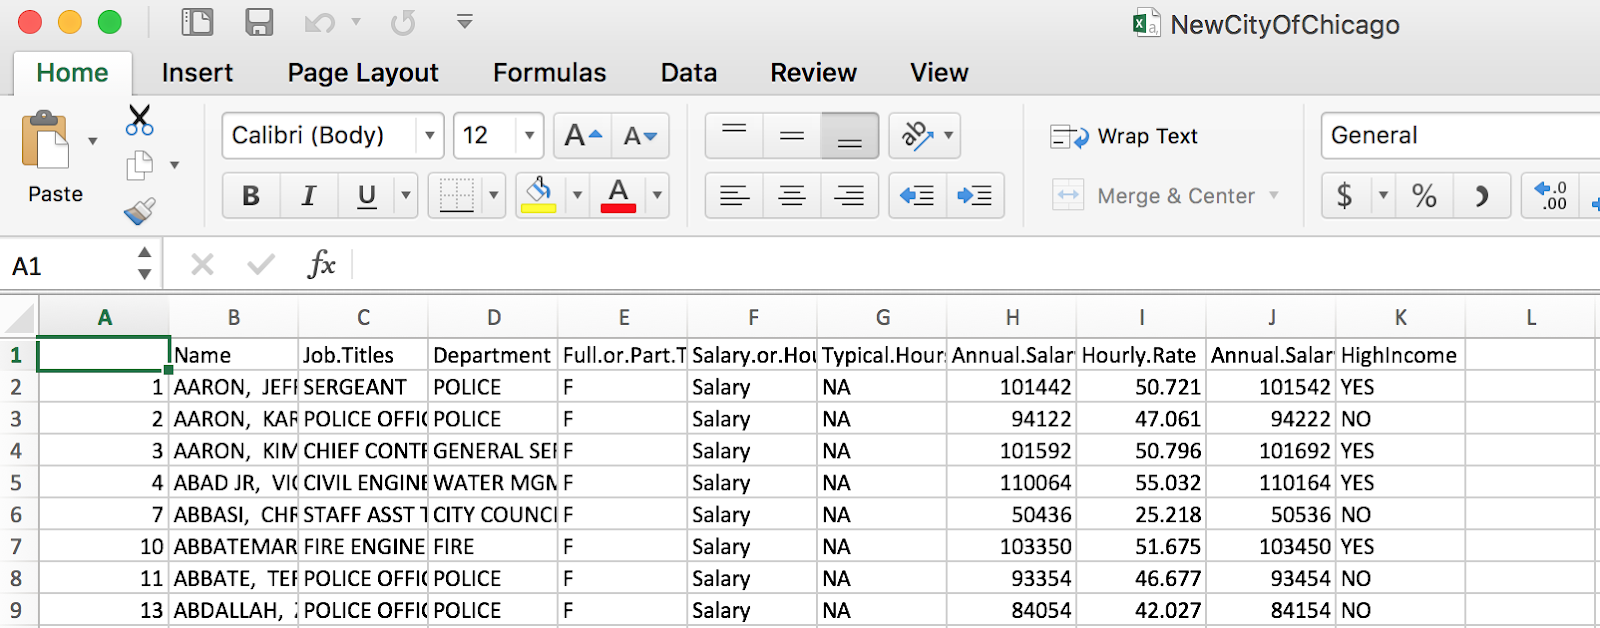

### Using RStudio

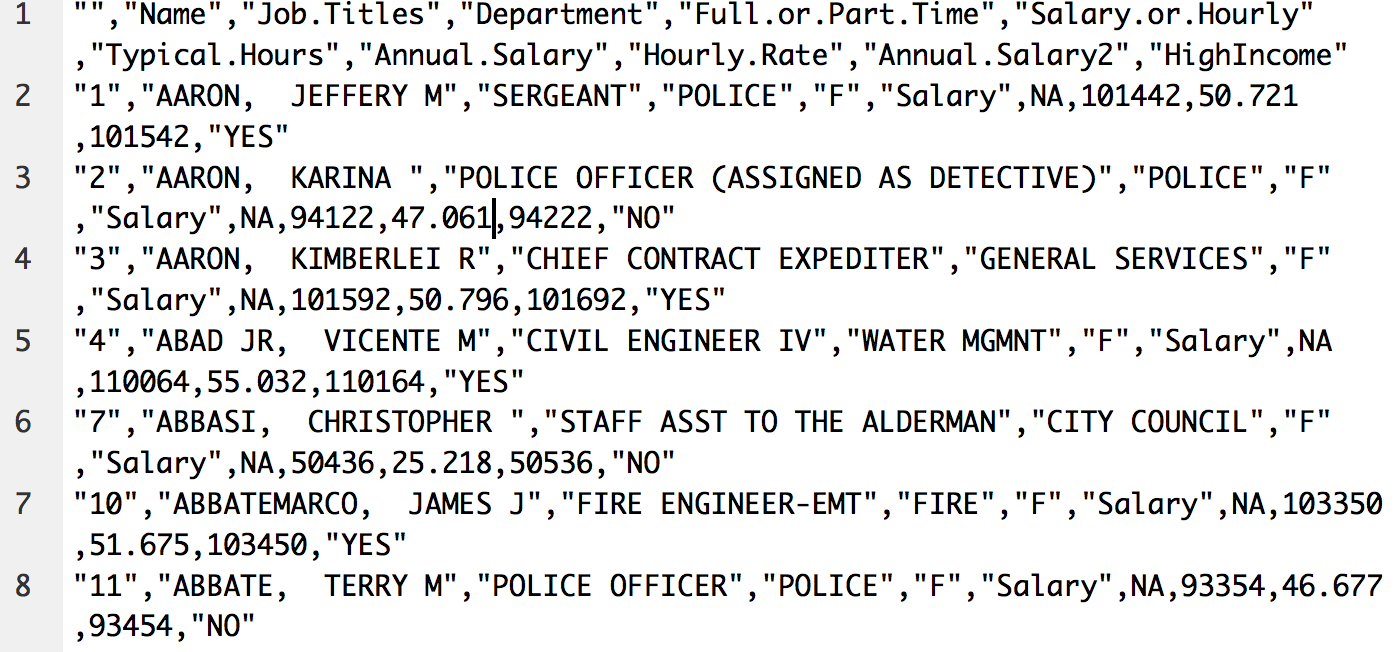